In [1]:
from skgstat import Variogram, OrdinaryKriging
import skgstat
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from collections import Counter

In [2]:
from adjustText import adjust_text

In [3]:
#c_annotated = pd.read_csv('unique_mutations_country.csv')
c_annotated = pd.read_csv('unique_mutations_country_annotated.csv')

In [4]:
#c_annotated = pd.read_csv('gp_data/region_mutations/unique_mutations_country_annotated.csv',index_col=0)

In [5]:
#Remove low counts
threshold = 5
filt = c_annotated[c_annotated['counts']>threshold]

#Remove low countries
lower = 10
upper = 100
filt = filt[(filt['countries']>=lower) & (filt['countries']<=upper)]

#Normalize
filt['genome'] = filt.loc[:,'0']/29903

#Trim Ends
trim=50
filt = filt[filt['0']>trim]
filt = filt[filt['1']<29901-trim]

print(filt.shape)
print(filt.mean())
filt.head()

(204, 11)
0                 16883.946078
1                 16884.122549
counts              981.308824
countries            19.406863
infection_rate      513.033489
fatality_rate         7.683415
genome                0.564624
dtype: float64


,descriptor,0,1,2,3,counts,countries,infection_rate,fatality_rate,mutation,genome
0,23403_23403_REF=A_ALT=G,23403,23403,REF=A,ALT=G,25824,84,602.160151,8.319451,S D614G,0.782631
1,3037_3037_REF=C_ALT=T,3037,3037,REF=C,ALT=T,25749,84,601.718015,8.325203,NSP3 F924F/F106F,0.101562
2,241_241_REF=C_ALT=T,241,241,REF=C,ALT=T,25741,84,602.628966,8.332760,NC 5UTR,0.008059
3,14408_14408_REF=C_ALT=T,14408,14408,REF=C,ALT=T,25740,84,603.807337,8.326784,RdRp P4715L/P323L,0.481825
4,25563_25563_REF=G_ALT=T,25563,25563,REF=G,ALT=T,9868,74,821.502343,5.141606,ORF3a Q57H,0.854864


26

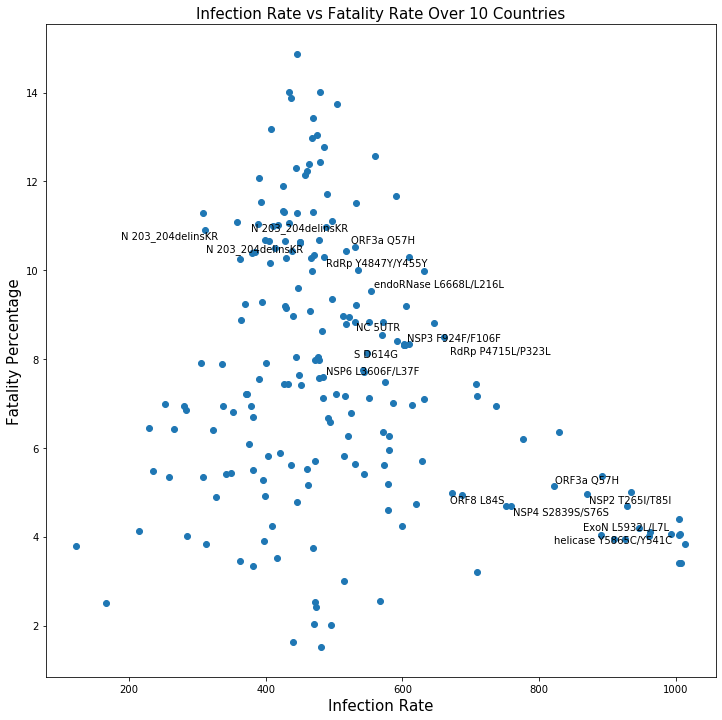

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
art = ax.scatter(filt['infection_rate'],filt['fatality_rate'])#, s=50, c=country_infections['infection_rate'], cmap='plasma')
ax.set_xlabel('Infection Rate',fontsize=15)
ax.set_ylabel('Fatality Percentage',fontsize=15)
ax.set_title('Infection Rate vs Fatality Rate Over 10 Countries',fontsize=15)

labeled = filt[~filt['mutation'].isna()]
x = labeled['infection_rate'].values
y = labeled['fatality_rate'].values
label = labeled['mutation'].values
texts = []
for i, txt in enumerate(label):
    texts.append(ax.text(x[i],y[i],txt))
adjust_text(texts)
#plt.colorbar(art);

Text(0.5, 1.0, 'Genome, Infection Rate and Fatality Rate')

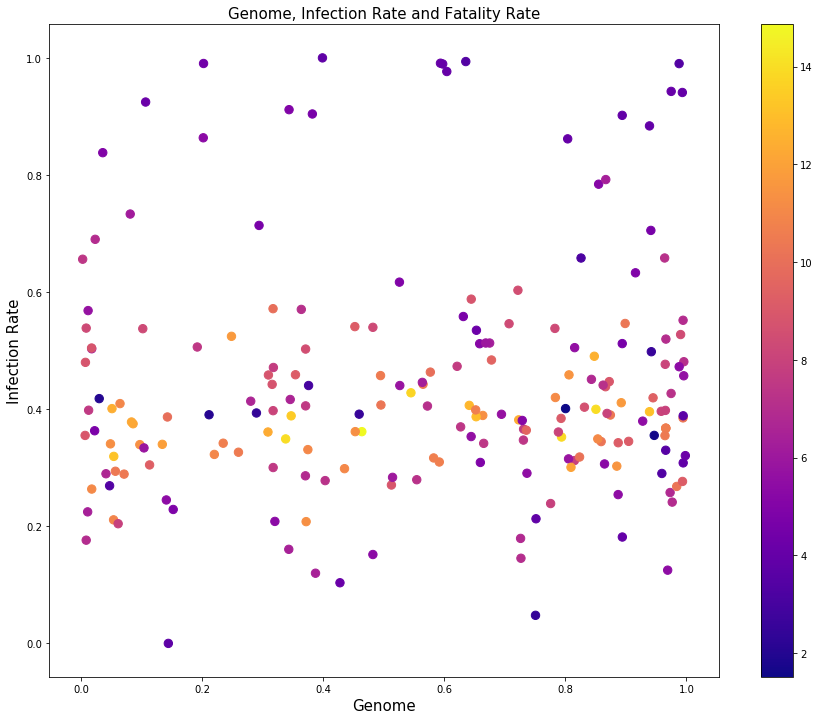

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(15, 12))
filt['infection_rate'] = (filt['infection_rate']-min(filt['infection_rate']))/(max(filt['infection_rate'])-min(filt['infection_rate']))
#filt['fatality_rate'] = (filt['fatality_rate']-min(filt['fatality_rate']))/(max(filt['fatality_rate'])-min(filt['fatality_rate']))

art = ax.scatter(filt['genome'],filt['infection_rate'], s=70, c=filt['fatality_rate'], cmap='plasma')
#art = ax.scatter(filt['genome'],filt['fatality_rate'], s=70, c=filt['infection_rate'], cmap='plasma')

plt.colorbar(art);
ax.set_xlabel('Genome',fontsize=15)
ax.set_ylabel('Infection Rate',fontsize=15)
ax.set_title('Genome, Infection Rate and Fatality Rate',fontsize=15)

{'name': 'spherical',
 'estimator': 'matheron',
 'effective_range': 0.21352896515992556,
 'sill': 82.16229718938968,
 'nugget': 9.976935001244435}

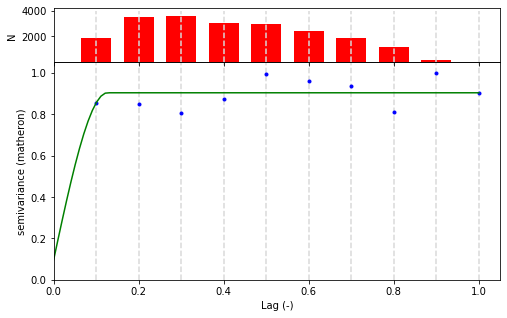

In [8]:
V=Variogram(filt[['genome','infection_rate']].values,filt['fatality_rate'].values,
           use_nugget=True)
V.plot()
V.fit()
V.describe()

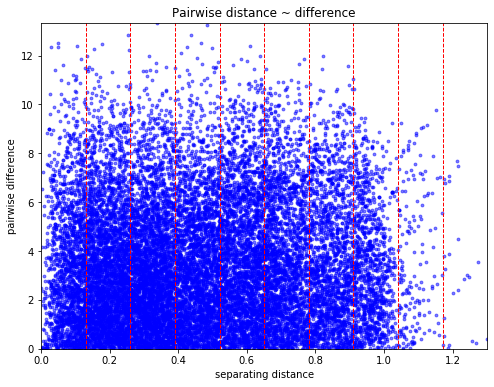

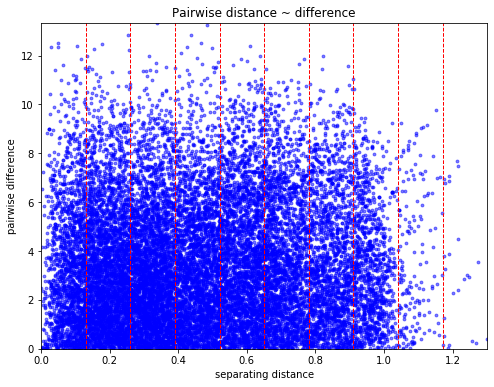

In [10]:
 V.distance_difference_plot()
    

In [11]:
ok = OrdinaryKriging(V, min_points=0, max_points=15, mode='exact')

In [12]:
xx, yy = np.mgrid[0:1:200j, 0:1:200j]
field = ok.transform(xx.flatten(), yy.flatten()).reshape(xx.shape)
s2 = ok.sigma.reshape(xx.shape)


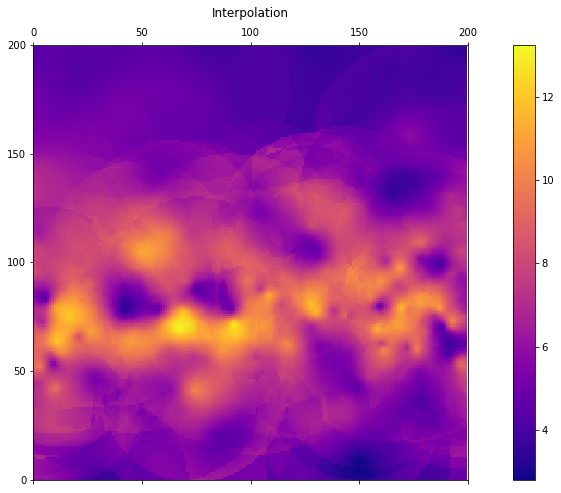

In [13]:
fig, axes = plt.subplots(1, 1, figsize=(16, 8))
art = axes.matshow(field.T, origin='lower', cmap='plasma')
axes.set_title('Interpolation')
#axes[0].plot(data.x, data.y, '+k')
axes.set_xlim((0,200))
axes.set_ylim((0,200))
plt.colorbar(art, ax=axes)

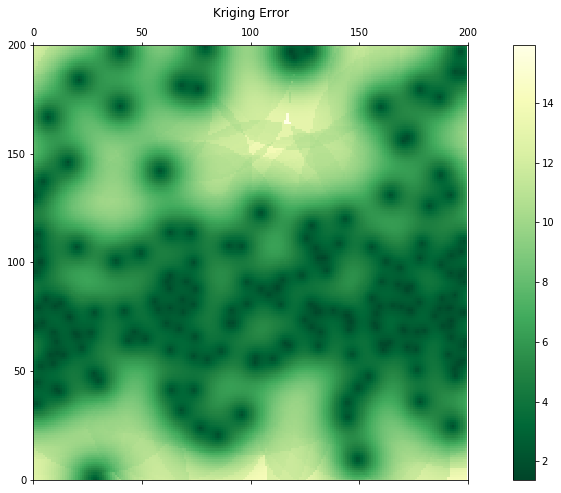

In [14]:
fig, axes = plt.subplots(1, 1, figsize=(16, 8))
art = axes.matshow(s2.T, origin='lower', cmap='YlGn_r')
axes.set_title('Kriging Error')
plt.colorbar(art, ax=axes)
#axes.plot(data.x, data.y, '+w')
axes.set_xlim((0,200))
axes.set_ylim((0,200));


In [15]:
s2.shape

(200, 200)

In [16]:
s2.min()

1.386186819882599

Text(0.5, 1.0, 'Genome, Infection Rate and Fatality Rate')

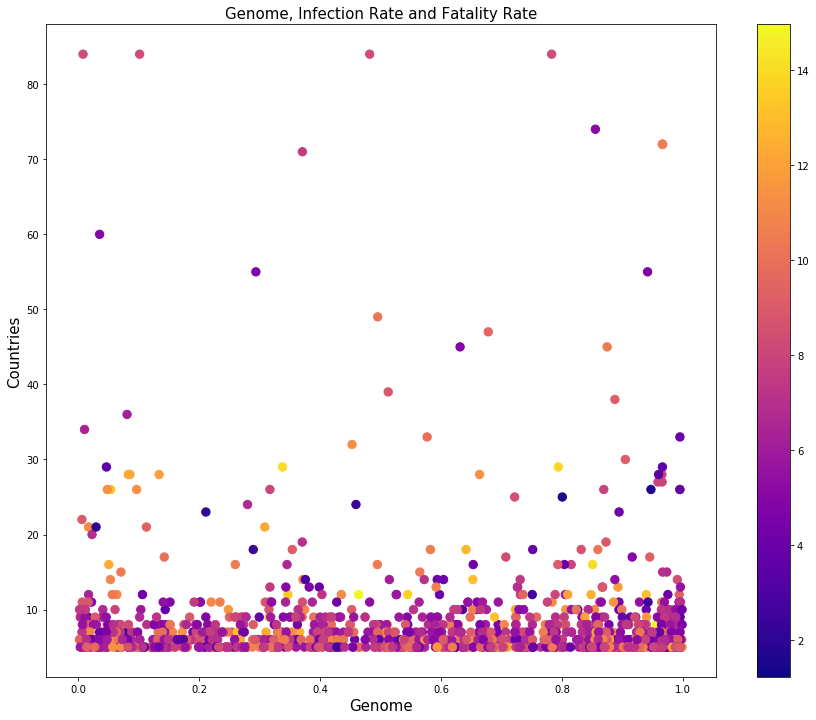

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(15, 12))

art = ax.scatter(filt['genome'],filt['countries'], s=70, c=filt['fatality_rate'], cmap='plasma')
plt.colorbar(art);
ax.set_xlabel('Genome',fontsize=15)
ax.set_ylabel('Countries',fontsize=15)
ax.set_title('Genome, Infection Rate and Fatality Rate',fontsize=15)

Text(0.5, 1.0, 'Genome, Infection Rate and Fatality Rate')

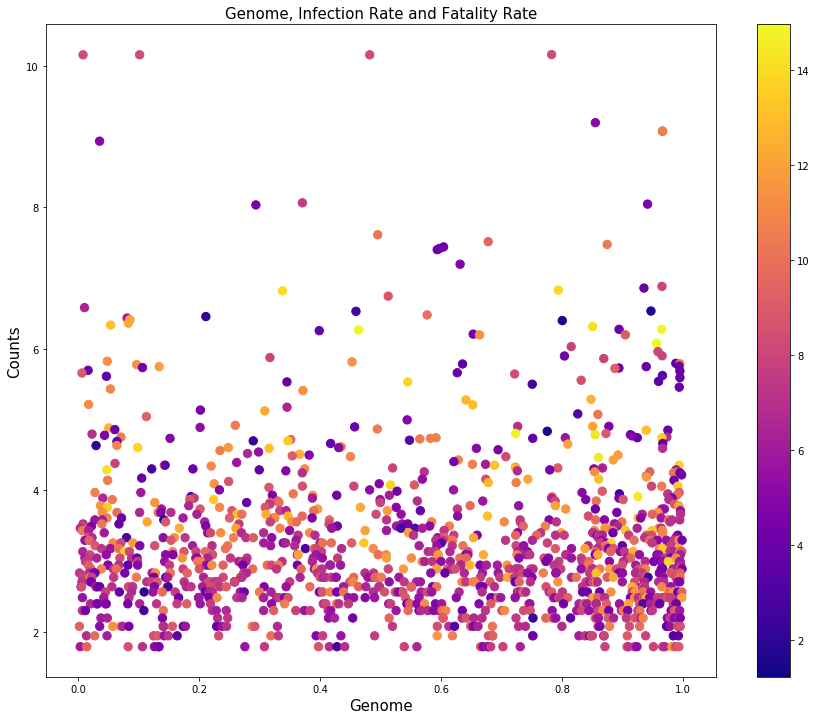

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(15, 12))

art = ax.scatter(filt['genome'],np.log(filt['counts']), s=70, c=filt['fatality_rate'], cmap='plasma')
plt.colorbar(art);
ax.set_xlabel('Genome',fontsize=15)
ax.set_ylabel('Counts',fontsize=15)
ax.set_title('Genome, Infection Rate and Fatality Rate',fontsize=15)

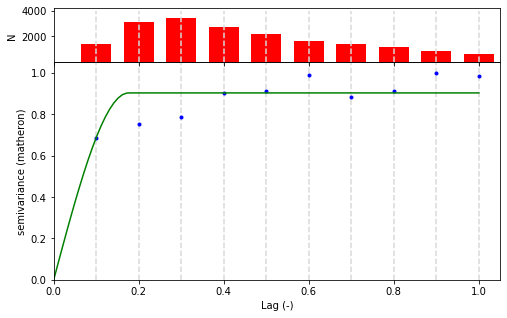

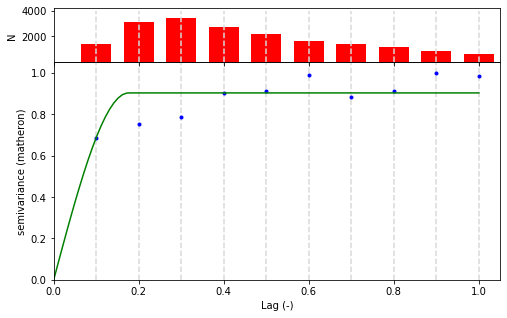

In [46]:
V=Variogram(np.stack((filt['genome'].values,np.log(filt['counts']).values),axis=1),
            filt['fatality_rate'].values,maxlag=0.5)
V.plot()

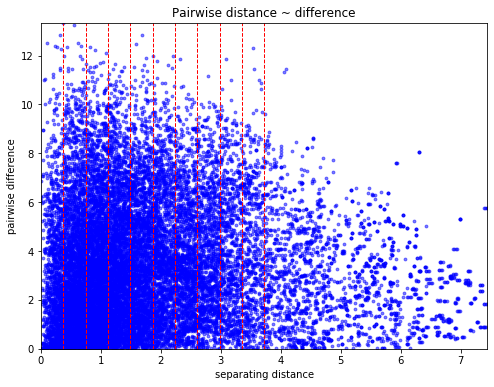

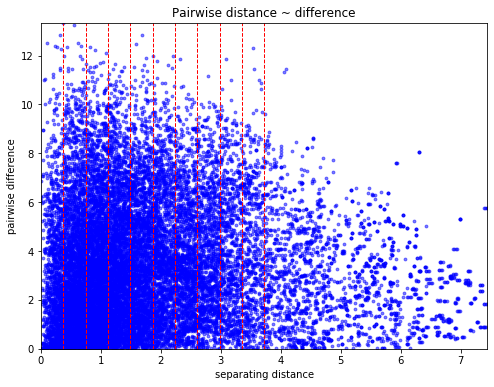

In [47]:
 V.distance_difference_plot()